In [1]:
#!/usr/bin/env python3

import os, sys
sys.path.append('../')
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

from triggers_helper import CalRatioHighET_L1,CalRatioLowET_L1,CalRatio_HLT
import sys
sys.path.append('../')

try:
    import mplhep as hep
    hep.style.use("ATLAS")
except:
    pass
delphesDir = os.path.abspath("../DelphesLLP")
os.environ['ROOT_INCLUDE_PATH'] = os.path.join(delphesDir,"external")

import ROOT


ROOT.gSystem.Load(os.path.join(delphesDir,"libDelphes.so"))

ROOT.gInterpreter.Declare('#include "classes/SortableObject.h"')
ROOT.gInterpreter.Declare('#include "classes/DelphesClasses.h"')
ROOT.gInterpreter.Declare('#include "external/ExRootAnalysis/ExRootTreeReader.h"')



Welcome to JupyROOT 6.30/06


True

## Read events

In [ ]:
# inputFile = '../pp2chi0chi0J_nosmear_scan/Events/run_01/ddmH_mS_500_m1_244_dm_90_ctau_3.0_delphes_events.root'
# inputFile = '../pp2chi0chi0J_nosmear_scan/Events/run_02/ddmH_mS_500_m1_244_dm_90_ctau_3.0_delphes_events.root'
# inputFile = '../pp2chi0chi0J_nosmear_scan/Events/run_03/ddmH_mS_500_m1_248_dm_94_ctau_3.0_delphes_events.root'
inputFile = '../pp2chi0chi0J_nosmear_scan/Events/run_03/ddmH_mS_500_m1_249_dm_95_ctau_3.0_delphes_events.root'

# inputFile = '../DelphesLLP/test.root'

### Get LLP decay position and time from truth level events (does not include propagation)

In [25]:
f = ROOT.TFile(inputFile,'read')
tree = f.Get("Delphes")

c_light = 2.99792458e8

nevts = tree.GetEntries()
rDecays = []
triggerFlags = []
betaNm1 = []
betaN = []
rhoNm1 = []
rhoN = []

for ievt in range(nevts):
    tree.GetEntry(ievt)

    # Get parton level MET and b-bar angular separation
    llps = list(tree.llpParticles)
    llpDec = {}
    llp_betas = {}
    for illp,llp in enumerate(llps):
        beta = np.sqrt(llp.Px**2 + llp.Py**2 + llp.Pz**2)/llp.E
        llp_betas[illp] = beta
    for d in tree.llpDirectDaughters:
        illp = d.M1        
        x = np.array([d.X,d.Y,d.Z,d.T])
        l = np.linalg.norm(x[:3])*1e-3
        t_readout = x[-1]-l/c_light
        # # Select only decays on the N-1 event
        # if t_readout > 10e-9:
        #     continue
        x[-1] = t_readout
        llpDec[illp] = x
    for illp,beta in llp_betas.items():
        t_readout = llpDec[illp][-1]
        rhoDec = np.linalg.norm(llpDec[illp][:2])/1e3
        if t_readout < 10e-9:
            betaNm1.append(beta)
            rhoNm1.append(rhoDec)
        elif 25e-9 < t_readout < 35e-9:
            betaN.append(beta)
            rhoN.append(rhoDec)
f.Close()

In [26]:
print(f'{len(betaNm1)} decays in N-1')
print(f'{len(betaN)} decays in N')

49156 decays in N-1
91 decays in N


### Plot decays

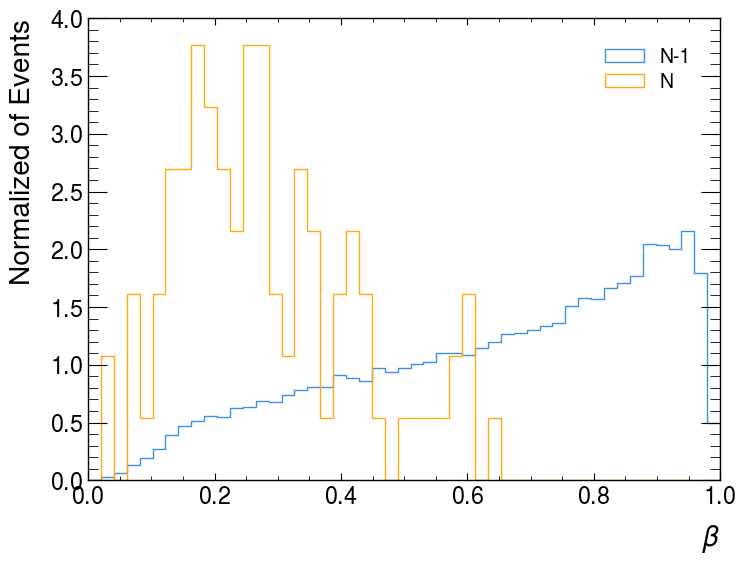

In [27]:
plt.hist(betaNm1, bins=np.linspace(0,1,50),label='N-1',density=True,histtype='step')
plt.hist(betaN, bins=np.linspace(0,1,50),label='N',density=True,histtype='step')
plt.xlabel(r'$\beta$')
plt.ylabel(r'Normalized of Events')
plt.legend()
plt.show()

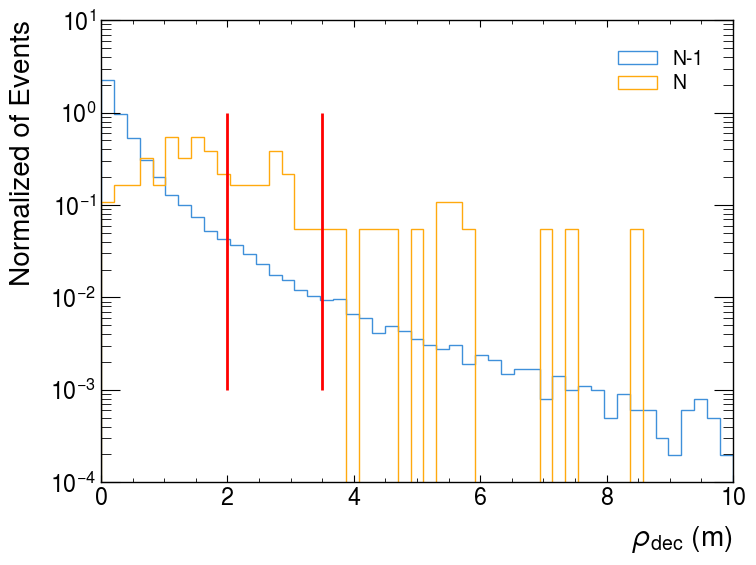

In [32]:
plt.hist(rhoNm1, bins=np.linspace(0,10,50),label='N-1',density=True,histtype='step')
plt.hist(rhoN, bins=np.linspace(0,10,50),label='N',density=True,histtype='step')
plt.xlabel(r'$\rho_{\rm dec}$ (m)')
plt.ylabel(r'Normalized of Events')
plt.yscale('log')
plt.vlines(x=[2.0,3.5],ymin=1e-3,ymax=1,colors='red')
plt.legend()
plt.show()

In [33]:
rhoNm1 = np.array(rhoNm1)

In [36]:
len(rhoNm1[(rhoNm1 < 4.0) & (rhoNm1 > 2.0)])/len(rhoNm1)

0.03562128733013264